# DSP PROJECT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fft import fft, ifft
import scipy
from scipy.io import loadmat
from IPython.lib.display import Audio
import scipy.signal as sgnl
%matplotlib notebook

### READING AUDIO FILE

x.shape= (220500, 2)
Fs= 44100


<IPython.core.display.Javascript object>


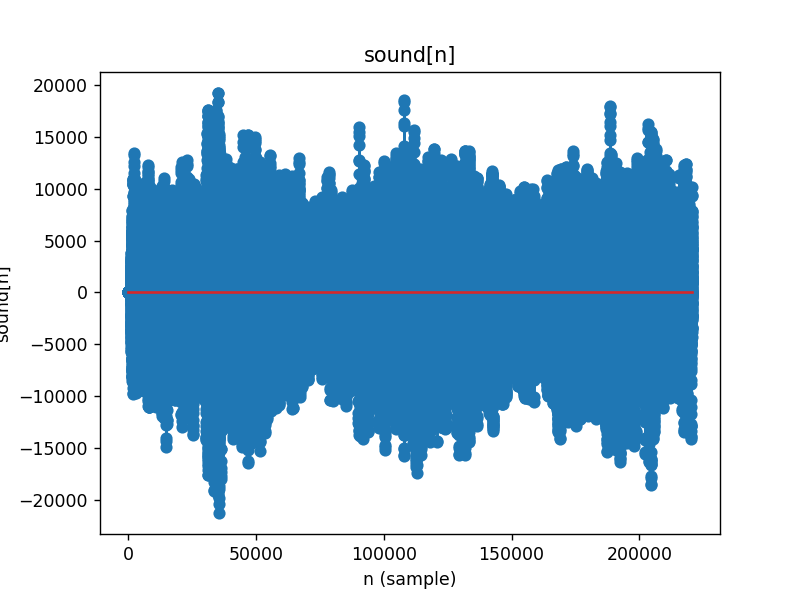

Sound:


In [2]:
#Reading the Sound
soundFile = 'Voices/konusma4.wav' #Sound's File Path
Fs, x = read(soundFile) #Defining the Sample Frequency and Dimension of Sound File

print("x.shape=",x.shape) #Dimension Info of X
print("Fs=",Fs)

sound = x[:,1] #Samples of X's First Channel
N_sound = len(x)
n=np.arange(0,N_sound) #Equalization of Sampling Index to Sound File's

#Plotting the Sound
plt.figure()
plt.stem(n,sound) 
plt.title("sound[n]")
plt.xlabel("n (sample)")
plt.ylabel("sound[n]")

#Display the Original Sound
print('Sound:')
display(Audio(sound, rate=Fs))

### FOURIER TRANSFORM

<IPython.core.display.Javascript object>


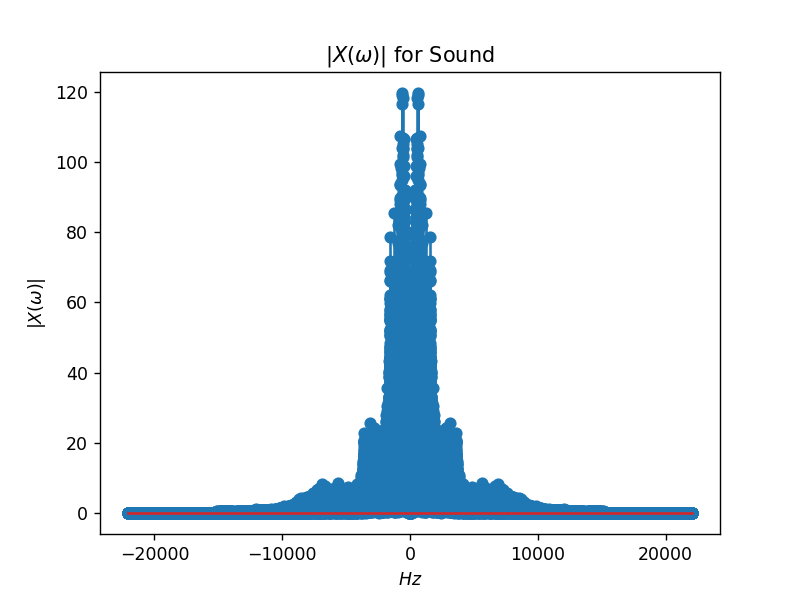

Text(0.5, 1.0, '$|X(\\omega)|$ for Sound')

In [3]:
# Fourier Transform of Sound
w = np.arange(-np.pi, np.pi, 2*np.pi/N_sound) #Defining the boundaries of Omega Axis to between -pi and pi
xw = np.fft.fftshift(np.fft.fft(sound,N_sound)/N_sound) #Fourier Transfor of Discrete Time Signal

#Plotting X(w)
plt.figure()
plt.stem(w*Fs/(2*np.pi),abs(xw))
plt.xlabel("$Hz$")
plt.ylabel("$|X(\omega)|$")
plt.title("$|X(\omega)|$ for Sound")

### ADDING FILTER

<IPython.core.display.Javascript object>


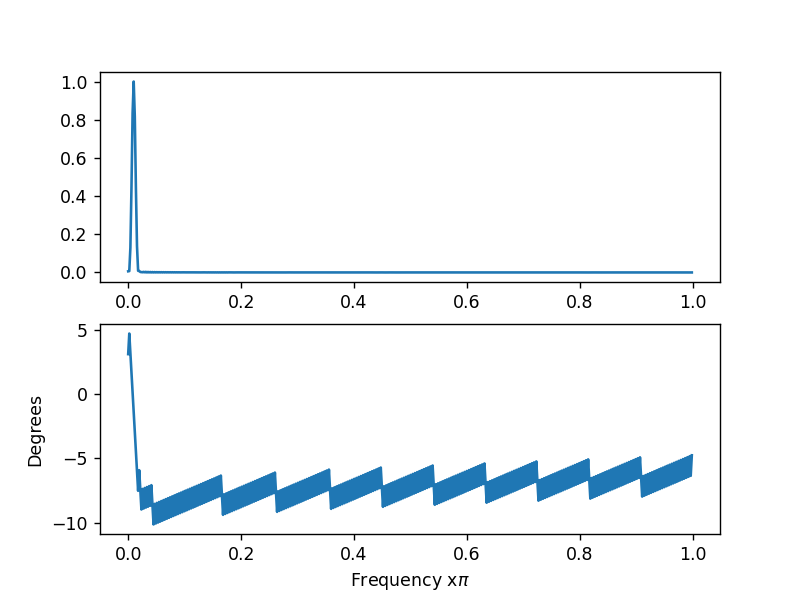

Text(0.5, 0, 'Frequency x$\\pi$')

In [4]:
#Adding the Filter designed with Pyfdax
filter_data = loadmat('klasik-bandpass-filter.mat')

#Defining the Coefficients of the Filter
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]

#Frequency Response of Filter
w_filter, Hw_filter=sgnl.freqz(b,1)
Hw_filter_mag = abs(Hw_filter)
Hw_filter_phs = np.unwrap(np.angle(Hw_filter))

#Plotting the Filter
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w_filter/np.pi, Hw_filter_mag)
ax2.plot(w_filter/np.pi, Hw_filter_phs) 
plt.ylabel('Degrees')
plt.xlabel('Frequency x$\pi$')

### FILTERING THE SIGNAL

<IPython.core.display.Javascript object>


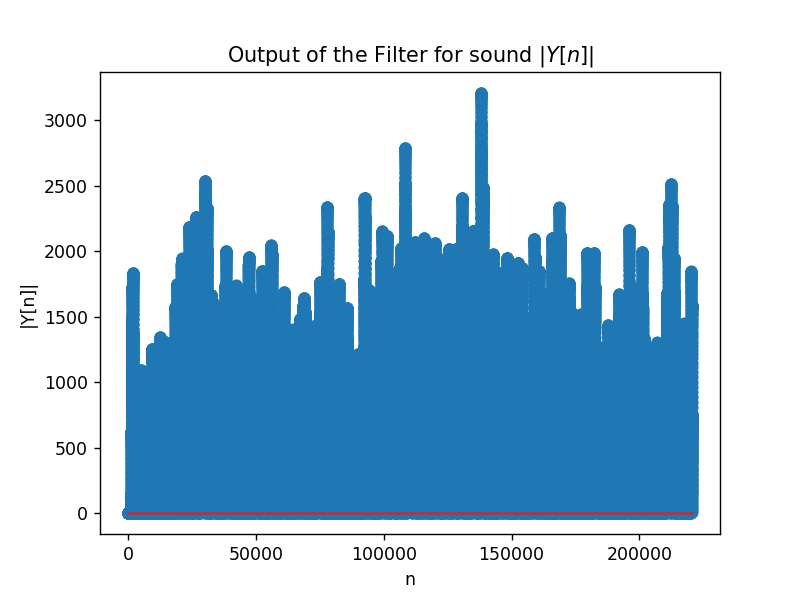

<IPython.core.display.Javascript object>


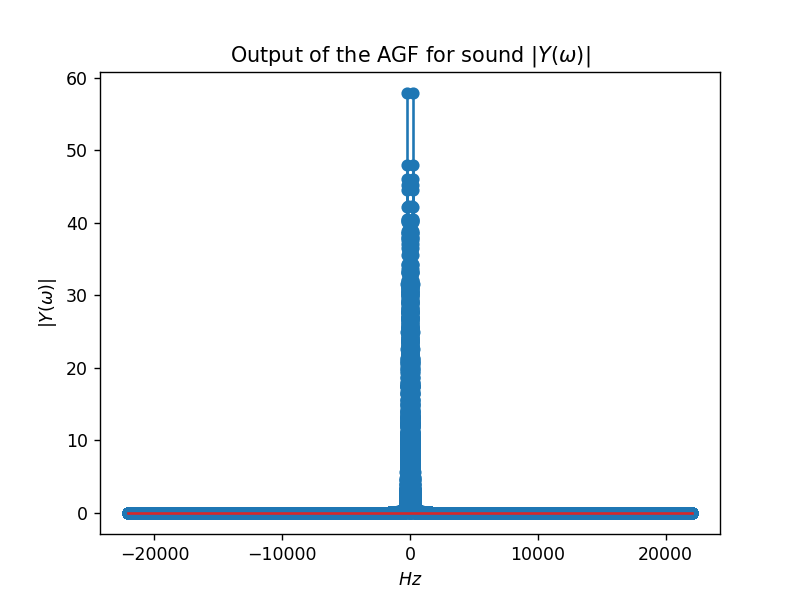

Text(0.5, 1.0, 'Output of the AGF for sound $|Y(\\omega)|$')

In [5]:
#Filtering the Sound Signal
filtered_sound = sgnl.lfilter(b,1, sound) #Using the Coefficients

#Plotting the Output of the Filter
plt.figure()
plt.stem(abs(filtered_sound))
plt.xlabel("n")
plt.ylabel("|Y[n]|")
plt.title("Output of the Filter for sound $ |Y[n]| $")

w = np.arange(-np.pi, np.pi, 2*np.pi/N_sound) #Defining the boundaries of Omega Axis to between -pi and pi
sound_yw = np.fft.fftshift(np.fft.fft(filtered_sound,N_sound)/N_sound) #Fourier Transfor of Discrete Time Signal

#Plotting the Fourier Transform of Output of the Filter
plt.figure()
plt.stem(w*Fs/(2*np.pi),abs(sound_yw))
plt.xlabel("$Hz$")
plt.ylabel("$|Y(\omega)|$")
plt.title("Output of the AGF for sound $|Y(\omega)|$")

In [6]:
#Audio Files of the Filtered and Original Ones
print('Sound file at output of the Filter:')
display(Audio(filtered_sound, rate=Fs))
print('Original Sound File:')
display(Audio(sound, rate=Fs))

Sound file at output of the Filter:


Original Sound File:


### ENERGY CALCULATION

In [7]:
# ENERJi HESABI YAPALIM

# Dinlediğimiz seslerin sonucunda istenilen sonuç tam olarak elde edildi mi emin olamazsak diye bir yazılımsal önlem aldık.
# Bu sayede filtreden geçemeyen işaretin enerjisi düşük olacaktır.
i=0
soundSum=0

# Parseval teoreminden elde edildi. Enerji = (1/N) * Bütün Y(w)'lerin toplamının karesi

for i in range (len(sound_yw)):
    soundSum+=(abs(sound_yw[i]))**2
    
soundEnergy=soundSum/N_sound

print("Sound Energy=",soundEnergy)

Sound Energy= 2.355293813409574
